In [1]:
## PROJECT NBA MATCHES RESULTS ##

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [3]:
# Load the data and drop redundant columns

games = pd.read_csv('data/games.csv')
display(games.head())

# Metadata of the column names 
'''
GAME_DATE_EST: Date when the match has been played. Rank from 2003-10-05 to 2020-03-01.
GAME_ID: Unique identifier of the match
GAME_STATUS_TEXT : Contains 'Final'
HOME_TEAM_ID: Unique identifier for Home/Local Team
VISITOR_TEAM_ID: Unique identifier for the Visitor Team
SEASON: Season when the game occured
TEAM_ID_home: Unique Identifier of the Home Team (dupplicate of HOME_TEAM_ID)
PTS_home: Total points scored by home team
FG_PCT_home: Field Goal Percentage Home Team
FT_PCT_home: Free Throw Percentage Home Team
FG3_PCT_home: Three Point Percentage Home Team
AST_home: Assists of the Home Team
REB_home: Rebounds of the Home Team
TEAM_ID_away: Unique Identifier of the Visitor Team (dupplicate of VISITOR_TEAM_ID)
PTS_away: Total points scored by Visitor team
FG_PCT_away: Field Goal Percentage Visitor Team
FT_PCT_away: Free Throw Percentage Visitor Team
FG3_PCT_away: Three Point Percentage Visitor Team
AST_away: Assists of the Visitor Team
REB_away: Rebounds of the Visitor Team
HOME_TEAM_WINS: Boolean indicating if Home Team wins (1) or not (0)
'''

# Size of the dataframe
print(games.shape)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2020-03-01,21900895,Final,1610612766,1610612749,2019,1610612766,85.0,0.354,0.900,...,22.0,47.0,1610612749,93.0,0.402,0.762,0.226,20.0,61.0,0
1,2020-03-01,21900896,Final,1610612750,1610612742,2019,1610612750,91.0,0.364,0.400,...,19.0,57.0,1610612742,111.0,0.468,0.632,0.275,28.0,56.0,0
2,2020-03-01,21900897,Final,1610612746,1610612755,2019,1610612746,136.0,0.592,0.805,...,25.0,37.0,1610612755,130.0,0.505,0.650,0.488,27.0,37.0,1
3,2020-03-01,21900898,Final,1610612743,1610612761,2019,1610612743,133.0,0.566,0.700,...,38.0,41.0,1610612761,118.0,0.461,0.897,0.263,24.0,36.0,1
4,2020-03-01,21900899,Final,1610612758,1610612765,2019,1610612758,106.0,0.407,0.885,...,18.0,51.0,1610612765,100.0,0.413,0.667,0.429,23.0,42.0,1


(23195, 21)


In [4]:
# Extract Month as Variable
games['MONTH'] = pd.DatetimeIndex(games['GAME_DATE_EST']).month

# Map HOME_TEAM_ID and VISITOR_TEAM_ID with Team Name
teams = pd.read_csv('data/teams.csv')

#Dict for mapping the team_id with Abrebiation of the Team
team_map = dict(zip(teams['TEAM_ID'], teams['ABBREVIATION']))
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].map(team_map)
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].map(team_map)

In [5]:
# Read and drop redundant columns

dropcols = ['GAME_ID', 'GAME_STATUS_TEXT', 'TEAM_ID_home', 'TEAM_ID_away', 'GAME_DATE_EST']
games = games.drop(dropcols, axis=1)
display(games.head())

,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,MONTH
0,CHA,MIL,2019,85.0,0.354,0.900,0.229,22.0,47.0,93.0,0.402,0.762,0.226,20.0,61.0,0,3
1,MIN,DAL,2019,91.0,0.364,0.400,0.310,19.0,57.0,111.0,0.468,0.632,0.275,28.0,56.0,0,3
2,LAC,PHI,2019,136.0,0.592,0.805,0.542,25.0,37.0,130.0,0.505,0.650,0.488,27.0,37.0,1,3
3,DEN,TOR,2019,133.0,0.566,0.700,0.500,38.0,41.0,118.0,0.461,0.897,0.263,24.0,36.0,1,3
4,SAC,DET,2019,106.0,0.407,0.885,0.257,18.0,51.0,100.0,0.413,0.667,0.429,23.0,42.0,1,3


## Data Exploration

In [6]:
# Get null values

games.isnull().sum()

HOME_TEAM_ID        0
VISITOR_TEAM_ID     0
SEASON              0
PTS_home           99
FG_PCT_home        99
FT_PCT_home        99
FG3_PCT_home       99
AST_home           99
REB_home           99
PTS_away           99
FG_PCT_away        99
FT_PCT_away        99
FG3_PCT_away       99
AST_away           99
REB_away           99
HOME_TEAM_WINS      0
MONTH               0
dtype: int64

Text(0.5, 1, 'Null values of Games Dataframe')

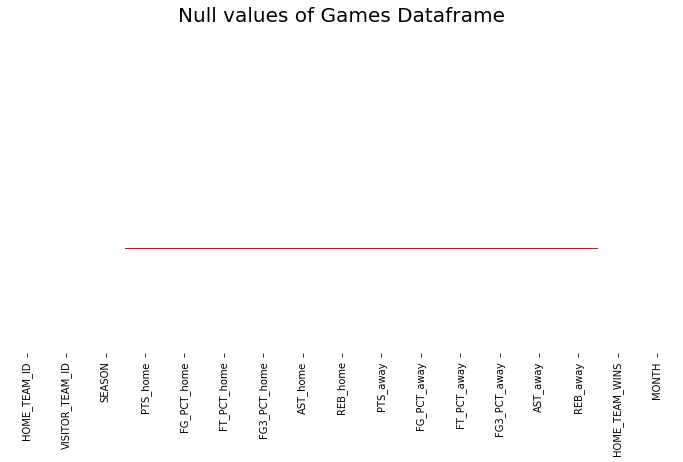

In [7]:
# Explore graphically where nulls are located

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax = sns.heatmap(games.isnull(), cbar=False, cmap=['white', 'firebrick'], yticklabels=False)
plt.title('Null values of Games Dataframe', size= 20)

In [8]:
# Drop all rows with NaN values

games = games.dropna(axis=0)
games.isnull().sum()

HOME_TEAM_ID       0
VISITOR_TEAM_ID    0
SEASON             0
PTS_home           0
FG_PCT_home        0
FT_PCT_home        0
FG3_PCT_home       0
AST_home           0
REB_home           0
PTS_away           0
FG_PCT_away        0
FT_PCT_away        0
FG3_PCT_away       0
AST_away           0
REB_away           0
HOME_TEAM_WINS     0
MONTH              0
dtype: int64

In [9]:
# Descriptive analysis of the variables

games.describe()

,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,MONTH
count,23096.000000,23096.000000,23096.000000,23096.000000,23096.000000,23096.000000,23096.000000,23096.000000,23096.000000,23096.000000,23096.000000,23096.000000,23096.000000,23096.000000,23096.000000
mean,2010.877771,102.149117,0.459901,0.757874,0.355458,22.512253,43.174359,99.168254,0.448125,0.756188,0.348710,21.099974,41.850061,0.594865,5.958434
std,4.812789,12.902191,0.056794,0.100397,0.114683,5.153124,6.597023,12.947992,0.055589,0.103148,0.112754,5.080440,6.495695,0.490929,4.368599
min,2003.000000,36.000000,0.250000,0.143000,0.000000,6.000000,15.000000,33.000000,0.244000,0.143000,0.000000,4.000000,19.000000,0.000000,1.000000
25%,2007.000000,93.000000,0.420000,0.696000,0.281000,19.000000,39.000000,90.000000,0.410000,0.692000,0.273000,18.000000,37.000000,0.000000,2.000000
50%,2011.000000,102.000000,0.459000,0.765000,0.355000,22.000000,43.000000,99.000000,0.447000,0.762000,0.348000,21.000000,42.000000,1.000000,4.000000
75%,2015.000000,111.000000,0.500000,0.826000,0.429000,26.000000,48.000000,108.000000,0.486000,0.828000,0.421000,24.000000,46.000000,1.000000,11.000000
max,2019.000000,168.000000,0.684000,1.000000,1.000000,47.000000,72.000000,168.000000,0.674000,1.000000,1.000000,46.000000,81.000000,1.000000,12.000000


In [10]:
# Calculate the win % of the Home team

n_matches =  games.shape[0]
n_homewins = len(games[games['HOME_TEAM_WINS'] == 1])
win_rate = n_homewins / n_matches

# Calculate number of features. -1 because one is the descriptor variable
n_features = games.shape[1] - 1

# Print the results
print(f'Total number of matches: {n_matches}')
print(f'Win rate of Home team: {round(win_rate * 100, 2)}%')
print(f'Number of descriptive variables: {n_features}')

Total number of matches: 23096
Win rate of Home team: 59.49%
Number of descriptive variables: 16


In [11]:
## Win Rate of Home Team is by chance?

# H0: p0 = 0.5
# H1: p1 != 0.5

H0 = 0.5
stat, pvalue = proportions_ztest(n_homewins, n_matches, H0)
print(f'The value of the z_test is: {round(stat,2)}')
print(f'The p-value of the statistic is {pvalue}')

# We can conclude that playing as Home Team affects to the win rate

# Calculate the confidence interval

confidence_interval = proportion_confint(n_homewins, n_matches, alpha=0.05)
print(f'The confidence interval with a 95% confidence is: {round(confidence_interval[0]*100, 2), round(confidence_interval[1]*100, 2)}')

The value of the z_test is: 29.37
The p-value of the statistic is 1.434584734258829e-189
The confidence interval with a 95% confidence is: (58.85, 60.12)


In [12]:
# Calculate win rate of each team by season


pctwins_by_season = pd.DataFrame()
# 2003 does not have all the complete teams
for season in np.sort(games['SEASON'][games['SEASON'] >= 2004].unique()):
    winners = pd.Series(np.where(games['HOME_TEAM_WINS'][games['SEASON'] == season], games['HOME_TEAM_ID'][games['SEASON'] == season], games['VISITOR_TEAM_ID'][games['SEASON'] == season])).value_counts()
    all_teams = games[games['SEASON'] == season][['HOME_TEAM_ID', 'VISITOR_TEAM_ID']].stack().value_counts()
    pctwins_by_season = pd.concat([pctwins_by_season, winners.div(all_teams, fill_value=0).mul(100).rename_axis('Team').reset_index(name=str(season))], axis=1)

pctwins_by_season = pctwins_by_season.loc[:,~pctwins_by_season.columns.duplicated()] #drop duplicated columns 
pctwins_by_season = pd.melt(pctwins_by_season, id_vars=['Team'], var_name='Year', value_name='Win')

pctwins_by_season.head()

,Team,Year,Win
0,ATL,2004,15.476190
1,BKN,2004,48.888889
2,BOS,2004,53.260870
3,CHA,2004,23.529412
4,CHI,2004,54.945055


In [13]:
# There are relationship between  Win% and Team and Season?

formula = 'Win ~ C(Team) + C(Year)'
model = ols(formula, pctwins_by_season).fit()
aov_table = statsmodels.stats.anova.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Team),20896.645804,29.0,4.094985,4.625865e-11
C(Year),25.542400,15.0,0.009677,1.000000e+00
Residual,76544.769464,435.0,NaN,NaN


We can conclude that there are a significative relation between Win% and Team and Season. 
Then, we can explore which groups are significative.

In [14]:
# Comparation between different seasons
# False --> no differences between groups
mc = statsmodels.stats.multicomp.MultiComparison(pctwins_by_season['Win'], pctwins_by_season['Year'])

# Bonferroni correction applied beacuse multiple groups differences are calculated
print((mc.allpairtest(stats.ttest_rel, method="b")[0]))

Test Multiple Comparison ttest_rel 
FWER=0.05 method=b
alphacSidak=0.00, alphacBonf=0.000
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
  2004   2005 -0.0345 0.9728       1.0  False
  2004   2006 -0.1237 0.9024       1.0  False
  2004   2007  0.0026 0.9979       1.0  False
  2004   2008  0.0186 0.9853       1.0  False
  2004   2009 -0.0191 0.9849       1.0  False
  2004   2010 -0.0399 0.9685       1.0  False
  2004   2011  0.0491 0.9612       1.0  False
  2004   2012 -0.0281 0.9778       1.0  False
  2004   2013 -0.0204 0.9839       1.0  False
  2004   2014 -0.0161 0.9873       1.0  False
  2004   2015  0.0045 0.9964       1.0  False
  2004   2016 -0.0441 0.9651       1.0  False
  2004   2017 -0.0406 0.9679       1.0  False
  2004   2018 -0.0228  0.982       1.0  False
  2004   2019 -0.2382 0.8134       1.0  False
  2005   2006 -0.1218 0.9039       1.0  False
  2005   2007  0.0242 0.9808       1.0  False
  2005   2008  0.0411 0.9675       1

In [15]:
# Comparation between different Teams
# False --> no differences between groups
mc = statsmodels.stats.multicomp.MultiComparison(pctwins_by_season['Win'], pctwins_by_season['Team'])

# Bonferroni correction applied beacuse multiple groups differences are calculated
print((mc.allpairtest(stats.ttest_rel, method="b")[0]))

Test Multiple Comparison ttest_rel 
FWER=0.05 method=b
alphacSidak=0.00, alphacBonf=0.000
group1 group2   stat    pval  pval_corr reject
----------------------------------------------
   ATL    BKN   0.8256  0.422       1.0  False
   ATL    BOS  -2.2946 0.0366       1.0  False
   ATL    CHA     1.65 0.1197       1.0  False
   ATL    CHI   -1.498 0.1549       1.0  False
   ATL    CLE  -0.9524  0.356       1.0  False
   ATL    DAL  -2.1444 0.0488       1.0  False
   ATL    DEN   -2.057 0.0575       1.0  False
   ATL    DET  -0.3626 0.7219       1.0  False
   ATL    GSW  -1.6153 0.1271       1.0  False
   ATL    HOU  -3.0683 0.0078       1.0  False
   ATL    IND  -1.3188  0.207       1.0  False
   ATL    LAC  -1.2403 0.2339       1.0  False
   ATL    LAL  -0.8438 0.4121       1.0  False
   ATL    MEM  -0.5736 0.5748       1.0  False
   ATL    MIA  -1.9008 0.0767       1.0  False
   ATL    MIL   -0.121 0.9053       1.0  False
   ATL    MIN   1.4804 0.1595       1.0  False
   ATL    NOP   0

There are signinificative differences between Home/Away Team according to?:
    - Points
    - FG_PCT
    - FT_PCT
    - FG3_PCT
    - AST
    - REB  

In [16]:
columns = ['PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'PTS_away',
       'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away']

for i in range(len(columns)//2):
    print(f'Statistical results of comparing {columns[i]} and {columns[i+6]}: {stats.ttest_ind(games[columns[i]], games[columns[i+5]], equal_var=False)}')
    
# We can conclude that there are no differences between Home and Away for any variable:

Statistical results of comparing PTS_home and PTS_away: Ttest_indResult(statistic=618.4977117792672, pvalue=0.0)
Statistical results of comparing FG_PCT_home and FG_PCT_away: Ttest_indResult(statistic=-1158.5524341365842, pvalue=0.0)
Statistical results of comparing FT_PCT_home and FT_PCT_away: Ttest_indResult(statistic=410.195279573571, pvalue=0.0)
Statistical results of comparing FG3_PCT_home and FG3_PCT_away: Ttest_indResult(statistic=-394.82762338290456, pvalue=0.0)
Statistical results of comparing AST_home and AST_away: Ttest_indResult(statistic=653.481091139385, pvalue=0.0)
Statistical results of comparing REB_home and REB_away: Ttest_indResult(statistic=402.8945838651963, pvalue=0.0)


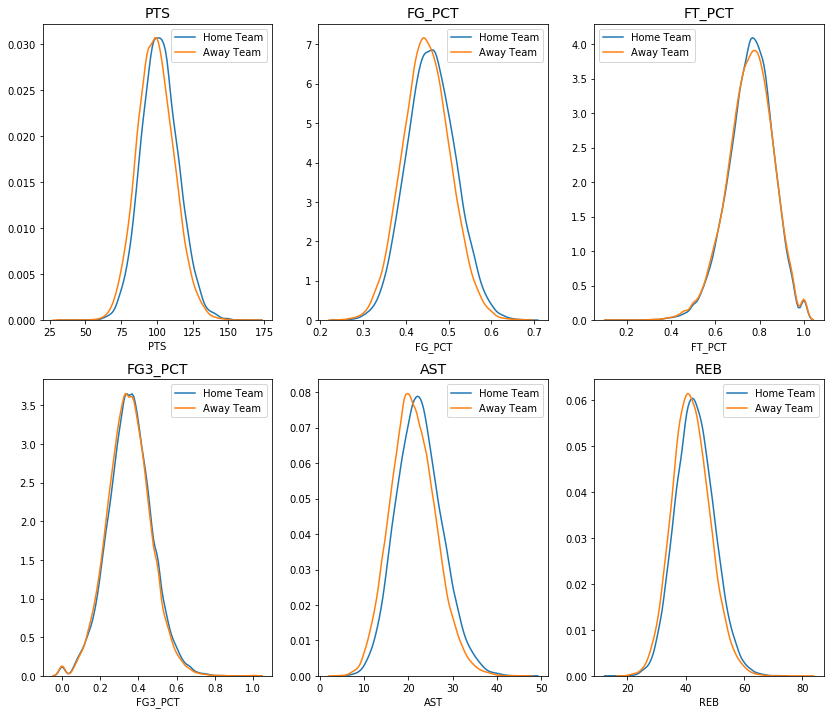

In [17]:
# Visualize the distribution of each variable
plt.figure(figsize=(14,12))
for i in range(6):
    plt.subplot(2, 3, i+1)
    sns.distplot(games[columns[i]], hist = False, kde = True, label='Home Team')
    sns.distplot(games[columns[i+6]], hist = False, kde = True, label='Away Team')
    plt.title(columns[i][0:-5], size= 14)
    plt.xlabel(columns[i][0:-5])

In [18]:
# Check if the variables follow a Normal Distribution or not #

test_columns = [column for column in games if games[column].dtype != 'object']

def check_normal_distribution(df, x):
    '''
    This function takes an array and return diferent statistics that checks 
    if x follows a Normal Distribution or not.
    Required: scipy.stats
    '''
    
    # Althought these different statistics are used in order to test normality, 
    # when the sample size is larger, they tend to fail to accept as informed in this kaggle post: 
    # https://www.kaggle.com/c/allstate-claims-severity/discussion/25062#143619

    KS, Kp_value = stats.kstest(df[x], 'norm')
    SW, SWp_value = stats.shapiro(df[x])
    sk, skp_value = stats.skewtest(df[x])
    kurtosis, kp_value = stats.kurtosistest(df[x])
    
    print(f' The column choosen is {x}')
    print (f' The statistic value for Kolmogorov test is {KS}, and the p-value is {Kp_value}')
    print (f' The statistic value for Shapiro-Wilks test is {SW}, and the p-value is {SWp_value}')
    print(f' ---------------------------------------')
    print (f' The statistic value for skewness is {sk}, and the p-value is {skp_value}')
    print (f' The statistic value for Kurtosis is {kurtosis}, and the p-value is {kp_value}')
    print(f' +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

for column in test_columns:
    check_normal_distribution(games, column)

 The column choosen is SEASON
 The statistic value for Kolmogorov test is 1.0, and the p-value is 0.0
 The statistic value for Shapiro-Wilks test is 0.9479072093963623, and the p-value is 0.0
 ---------------------------------------
 The statistic value for skewness is 0.6011923577504379, and the p-value is 0.5477118739954275
 The statistic value for Kurtosis is -149.61261126893177, and the p-value is 0.0
 +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
 The column choosen is PTS_home
 The statistic value for Kolmogorov test is 1.0, and the p-value is 0.0
 The statistic value for Shapiro-Wilks test is 0.9973746538162231, and the p-value is 1.8566411353225091e-19
 ---------------------------------------
 The statistic value for skewness is 11.506571884446743, and the p-value is 1.2224164493362544e-30
 The statistic value for Kurtosis is 5.585639616804339, and the p-value is 2.328416379939947e-08
 +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

C:\Users\unoma\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


From these statistics we can conclude that any of these variables follow a Normal Distribution. 
Therefore we are going to first standardize the variables (to make them comparable) and then normalize in order to aproximate them to a normal distribution.

In [19]:
# Standardize the variables

def standardize(x):
    '''
    This functions takes an array an returns the standarized value of each element.
    Required: numpy
    '''  
    mean = np.mean(x)
    std = np.std(x)
    
    return (x - mean) / std

standarized_columns = [i for i in test_columns if i not in ['SEASON', 'MONTH', 'HOME_TEAM_WINS']]
for column in standarized_columns:
    games[column] = standardize(games[column])
    
games.head()

,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,MONTH
0,CHA,MIL,2019,-1.329192,-1.864706,1.415674,-1.102700,-0.099408,0.579917,-0.476397,-0.829770,0.056348,-1.088325,-0.216516,2.948161,0,3
1,MIN,DAL,2019,-0.864145,-1.688626,-3.564681,-0.396390,-0.681592,2.095785,0.913810,0.357532,-1.204008,-0.653741,1.358184,2.178404,0,3
2,LAC,PHI,2019,2.623711,2.325990,0.469407,1.626620,0.482775,-0.935951,2.381251,1.023141,-1.029497,1.235368,1.161347,-0.746674,1,3
3,DEN,TOR,2019,2.391187,1.868182,-0.576468,1.260385,3.005571,-0.329604,1.454446,0.231606,1.365178,-0.760170,0.570834,-0.900625,1,3
4,SAC,DET,2019,0.298474,-0.931484,1.266264,-0.858543,-0.875653,1.186264,0.064239,-0.631887,-0.864681,0.712093,0.373997,0.023083,1,3


### Correlation between variables

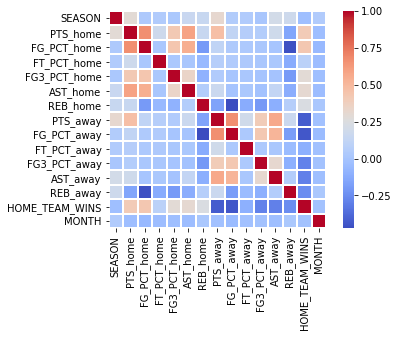

In [20]:
sns.heatmap(games.corr(), cmap='coolwarm', linewidths=1, square= True)

As we can see, the main variables related with HOME_TEAMS_WINS are PTS_home/away and FG_PCT_home/away. These variables seem intuitively important because the points are the main descriptor of a win or loss, and then the Field_PCT because is the main form of scoring points.

## Bonus: Prediction Model for NBA Basketball matches

We also want to predict, if it is possible from the data, given a match if a team can win or not. Then, we also will try to predict also the result.

In [21]:
from sklearn.model_selection import train_test_split

X_all = games[standarized_columns]
y_all = games['HOME_TEAM_WINS']

# Shuffle and split the dataset into training and testing set.
x_train, x_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.2, random_state = 2, stratify = y_all)

In [22]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

C:\Users\unoma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
predictions = logisticRegr.predict(x_test)

In [24]:
# Measuring Performance
score = logisticRegr.score(x_test, y_test)
print(f' Global score is {score}')

 Global score is 1.0


In [25]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(f' The confusion matrix is \n{cm}')

 The confusion matrix is 
[[1872    0]
 [   0 2748]]


Text(0.5, 1, 'Confusion Matrix for Logistic Model')

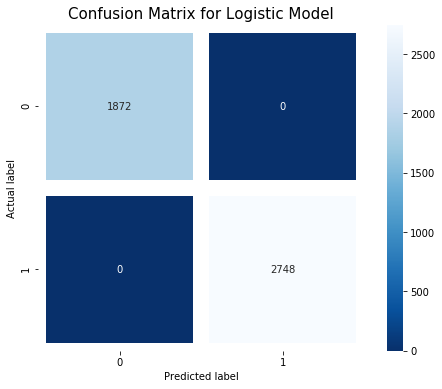

In [26]:
# Plotting the result
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", linewidths=15, square= True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix for Logistic Model', size = 15)

In [27]:
# Results of the model
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1872
           1       1.00      1.00      1.00      2748

    accuracy                           1.00      4620
   macro avg       1.00      1.00      1.00      4620
weighted avg       1.00      1.00      1.00      4620



In [28]:
# Main variables
log_coeficients = pd.DataFrame({'Descriptors':standarized_columns, 'Logisitic Coeficient': logisticRegr.coef_.tolist()[0]})
log_coeficients

,Descriptors,Logisitic Coeficient
0,PTS_home,16.131981
1,FG_PCT_home,0.170056
2,FT_PCT_home,0.062263
3,FG3_PCT_home,0.017719
4,AST_home,0.040213
5,REB_home,0.038370
6,PTS_away,-16.193079
7,FG_PCT_away,-0.218268
8,FT_PCT_away,0.024721
9,FG3_PCT_away,-0.053117


We can see that the main variables used in the model are PTS_home and PTS_away.

In [29]:
### Prediction of the match result

from sklearn.ensemble import RandomForestRegressor
columns = ['FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'SEASON', 'MONTH', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away', 'HOME_TEAM_WINS']
X_all = games[columns]
y_all = pd.read_csv('data/games.csv')[['PTS_home', 'PTS_away']].dropna(axis=0) # Unestandarized

# Shuffle and split the dataset into training and testing set.
x_train, x_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.2)

In [30]:
rf = RandomForestRegressor()

# Train the model
model = rf.fit(x_train, y_train)

C:\Users\unoma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [31]:
# Use the forest's predict method on the test data
predictions = rf.predict(x_train)

print(model.predict(x_test).astype(int), y_test)

[[100  91]
 [106  92]
 [ 93  87]
 ...
 [ 84  88]
 [ 84  94]
 [ 98 104]]        PTS_home  PTS_away
18487      95.0      89.0
15636     111.0      98.0
14526      72.0      71.0
21012     115.0     104.0
8106      115.0     113.0
...         ...       ...
20709     121.0     114.0
19518     103.0     105.0
14988      81.0      84.0
23044     105.0     110.0
5337       95.0     101.0

[4620 rows x 2 columns]


In [32]:
print(f'The accuracy model is: {round(model.score(x_test, y_test)*100,2)}%')

The accuracy model is: 71.11%


C:\Users\unoma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [34]:
# Main variables in the model
coeficients = pd.DataFrame({'Descriptors':columns, 'Coeficient': rf.feature_importances_})
coeficients

,Descriptors,Coeficient
0,FG_PCT_home,0.185007
1,FT_PCT_home,0.035653
2,FG3_PCT_home,0.029448
3,AST_home,0.040057
4,REB_home,0.061982
5,SEASON,0.108876
6,MONTH,0.011531
7,FG_PCT_away,0.191331
8,FT_PCT_away,0.034730
9,FG3_PCT_away,0.031012


The main variables for the model performance are FG_PCT Home and Away, Home_Team_Wins and Season.

In order to improve the model, we can toy with the different parameters of the RandomForestRegressor (the values applied in this model are the default values). Also, in order to improve the accuracy of the model, it could be necessary to add new variables from other sources and trying to create new ones from the currently available, following a process called feature engeineering. These new features could have more predictive power than the current ones. Finally, we can try other classificator models and/or preform as a pre-analysis a PCA with the variables.